In [1]:
# 드랍아웃의 성능향상을 측정
# 교차검증으로 측정

In [2]:
# 데이터 확보
import numpy as np
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# 표준화
x_train = x_train.astype('float32')/ 255.0
x_test = x_test.astype('float32')/ 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [4]:
# 하이퍼 매개변수
batch_size = 128
epochs = 10
k = 5

In [5]:
from sklearn.model_selection import KFold
from tensorflow.keras.layers import *

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [7]:
# 드랍아웃 비율에 따라서 교차 검증을 수행
def cross_validation(dropout_rate:list):
  accuracy = []
  for train_index, val_index in KFold(k).split(x_train):
    x_tr,x_val = x_train[train_index],x_train[val_index]
    y_tr,y_val = y_train[train_index],y_train[val_index]
    # 신경망 모델 설계 ccpd ccpd fl fc d fc
    cnn = tf.keras.models.Sequential()
    cnn.add(Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)))
    cnn.add(Conv2D(32,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[0]))

    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[1]))

    cnn.add(Flatten())

    cnn.add(Dense(512,activation='relu'))
    cnn.add(Dropout(dropout_rate[2]))
    cnn.add(Dense(10,activation='softmax'))

    #신경망 모델 학습하고 평가
    cnn.compile(loss = tf.keras.losses.categorical_crossentropy,optimizer='adam', metrics=['accuracy'])
    cnn.fit(x_tr,y_tr,batch_size=batch_size,epochs=epochs)
    accuracy.append(cnn.evaluate(x_val,y_val)[1])
  return accuracy

In [8]:
acc_without_dropout = cross_validation([0.0,0.0,0.0])
acc_with_dropout = cross_validation([0.25,0.25,0.5])

Epoch 1/10
313/313 [==============================] - 12s 10ms/step - loss: 1.5940 - accuracy: 0.4168
Epoch 2/10
313/313 [==============================] - 3s 9ms/step - loss: 1.2405 - accuracy: 0.5570
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 1.0408 - accuracy: 0.6325
Epoch 4/10
313/313 [==============================] - 3s 9ms/step - loss: 0.8971 - accuracy: 0.6866
Epoch 5/10
313/313 [==============================] - 3s 9ms/step - loss: 0.7738 - accuracy: 0.7298
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6676 - accuracy: 0.7670
Epoch 7/10
313/313 [==============================] - 3s 9ms/step - loss: 0.5703 - accuracy: 0.8019
Epoch 8/10
313/313 [==============================] - 3s 9ms/step - loss: 0.4805 - accuracy: 0.8331
Epoch 9/10
313/313 [==============================] - 3s 9ms/step - loss: 0.3786 - accuracy: 0.8679
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.9768 - accuracy: 0.72

In [10]:
np.array(acc_without_dropout).mean(), np.array( acc_with_dropout).mean()

(0.7245999813079834, 0.7470800042152405)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7ee5a62d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc7ee5a6d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc7ee618c90>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc7ee5af850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7ee5afd90>,
 'means': []}

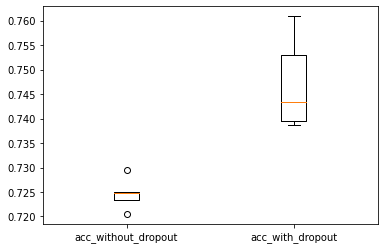

In [11]:
# 박스플롯으로 정확률 표시
import matplotlib.pyplot as plt
plt.boxplot([acc_without_dropout,acc_with_dropout],labels = ['acc_without_dropout','acc_with_dropout'])

In [12]:
# 가중치 감쇠 weight decay : 성능을 유지한 채로 가중치 크기를 낮추는 규제 기법

In [14]:
from tensorflow.keras import regularizers

In [15]:
# 성능평가.. 
# 검증... 교차검증
# 제거 조사 ablation study  - 여러선택사항중에서 하나씩 배고 성능을 측정

In [ ]:
# 재활용 가능한 코드로 만들어서 테스트
# 마지막 출력층에.. 적용..
cnn.add(Dense(10,activation='softmax', kernel_regularizer = regularizers.l1(0.01)))
cnn.add(Dense(10,activation='softmax', kernel_regularizer = regularizers.l2(0.01)))